Bài tập về nhà 02: Phân loại chữ số viết tay (MNIST)

In [5]:
# chuẩn bị data
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 5

Using device: cpu


In [6]:
# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Số lượng ảnh train: {len(train_dataset)}")
print(f"Số lượng ảnh test: {len(test_dataset)}")

100.0%
100.0%
100.0%
100.0%

Số lượng ảnh train: 60000
Số lượng ảnh test: 10000


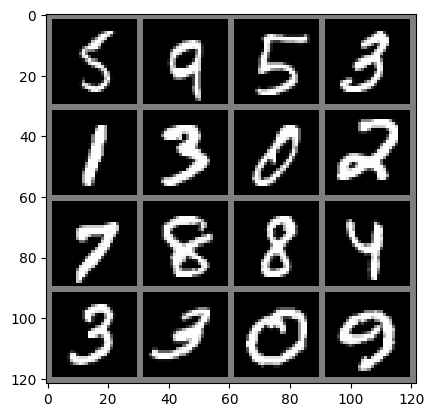

Labels: [5, 9, 5, 3, 1, 3, 0, 2, 7, 8, 8, 4, 3, 3, 0, 9]


In [7]:
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:16], nrow=4))
print('Labels:', labels[:16].tolist())

In [ ]:
# xây dựng mô hình
class ANN(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, num_classes=10):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()              
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.relu = nn.ReLU()                  
        self.fc2 = nn.Linear(hidden_size, num_classes)
       

    def forward(self, x):
        out = self.flatten(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = ANN().to(device)
print(model)

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
# training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

loss_history = []

print("Bắt đầu luyện công...")
for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}')

print("Training Finished")

Bắt đầu luyện công...
Epoch [1/5], Loss: 0.3868
Epoch [2/5], Loss: 0.1981
Epoch [3/5], Loss: 0.1461
Epoch [4/5], Loss: 0.1195
Epoch [5/5], Loss: 0.0996
Training Finished


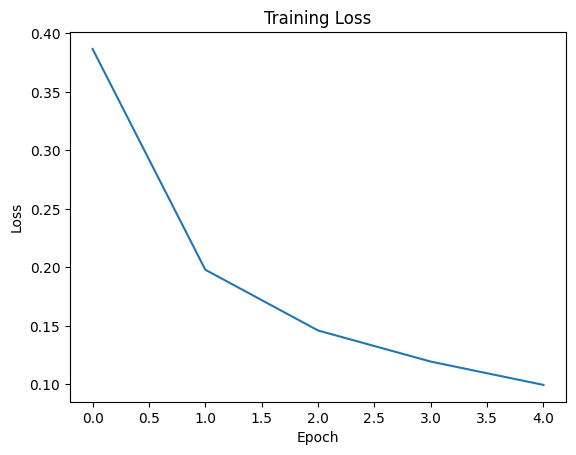

In [10]:
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [11]:
#test
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Độ chính xác trên 10,000 ảnh test: {100 * correct / total} %')


Độ chính xác trên 10,000 ảnh test: 97.01 %


Thực tế:  [7, 2, 1, 0, 4]
Dự đoán:  [7, 2, 1, 0, 4]


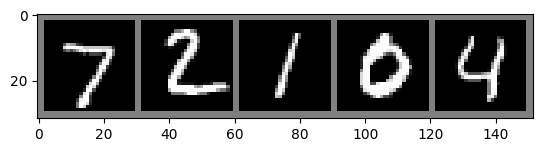

In [12]:
# dự đoán vài ảnh cụ thể
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

output = model(images[:5])
_, predicted = torch.max(output, 1)

print('Thực tế: ', labels[:5].cpu().tolist())
print('Dự đoán: ', predicted.cpu().tolist())

imshow(torchvision.utils.make_grid(images[:5].cpu(), nrow=5))